<a href="https://colab.research.google.com/github/COMM599-Fall2023/fall_2023/blob/week_2/week2/Week_2_COMM_599.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install requests bs4 wbdata

In [ ]:
%load_ext rpy2.ipython

##Week 2 -  Getting setup and getting your data.

###Setup

Welcome to week two of COMM 599. The technical half of this week's class is focused on two main parts, getting you set up to submit assigments and code to the class repository and going over some of the ways that you can get data.

Let's start by creating a Python or R notebook for you to write your code in.

You can make a Python Colab by clicking [here ](https://colab.research.google.com/) or an R notebook by clicking [here](https://colab.research.google.com/notebook#create=true&language=r).

Open a new notebook and let's create a simple `Hello World` program to demonstrate how to run code in this environment. Rename your notebook to `Hello World - {your USC username}` and insert a cell that prints the text "Hello World" in Python this would look like this.




In [9]:
output = "Hello World"
print(output)

Hello World


And in R it would be. We can run R and python in the same notebook byh using the `%%R` cell magic or `%R` line magic command to tell the interpreter to expect R code.

In [10]:
%%R

r_output <- "Hello World (in R)!"
print(r_output)

[1] "Hello World (in R)!"


Now let's head to github. If you have not already make a github account using your USC email. You should have an invitation to join the COMM-599 Fall 2023 repository. This is a private repository that is only visible to other members of the class.


The repository is how you will submit assignments, code and slides. Code should be as a raw .py or .R file or a notebook file. Images and visualizations should be uploaded as .png files if possible. Dashboards and more complex visualizations should be bundled with their source data into one file. Finally slide decks also need to be added to the repo either as a .pdf snapshot of the deck.


Once logged into github and are in the org go to your hello world file and select Save a Copy to Github.


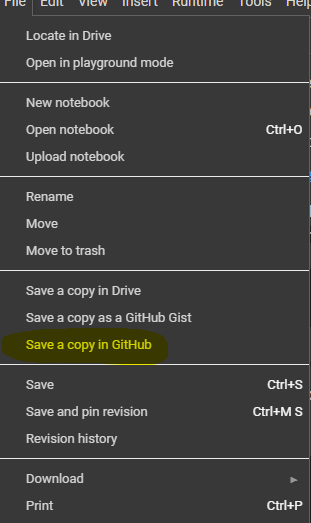


From there create a branch off of main with your USC username and the flag week 2 and commit your code to a folder under your usc username with the subfolder week 2.

So for me it would be

/main/joshuaac/week2/hello_world.ipynb

Once the code is committed create a pull request and tag your reviewer in it. After the approve merge your branch into main.


---

## Getting Data


For the back half of the class let's demonstrate some of the various ways that you can get or use data.


***Method 1 - Pre Structured Data Sources***


Major organizations such as the UN or World Bank make their data available through well structured APIs, many of which have a package associated with them.


Using these data sources is simply a matter of finding the library and reading the documentation. Unfortunately they are sometimes rather arcane and bespoke but usually will give access to powerful data.



In [12]:
import wbdata
import pandas as pd
import numpy as np
import seaborn as sns

In [13]:
sns.set(rc={'figure.figsize':(16.,12.)})

In [15]:
wbdata.get_country()

id    name
----  --------------------------------------------------------------------------------
ABW   Aruba
AFE   Africa Eastern and Southern
AFG   Afghanistan
AFR   Africa
AFW   Africa Western and Central
AGO   Angola
ALB   Albania
AND   Andorra
ARB   Arab World
ARE   United Arab Emirates
ARG   Argentina
ARM   Armenia
ASM   American Samoa
ATG   Antigua and Barbuda
AUS   Australia
AUT   Austria
AZE   Azerbaijan
BDI   Burundi
BEA   East Asia & Pacific (IBRD-only countries)
BEC   Europe & Central Asia (IBRD-only countries)
BEL   Belgium
BEN   Benin
BFA   Burkina Faso
BGD   Bangladesh
BGR   Bulgaria
BHI   IBRD countries classified as high income
BHR   Bahrain
BHS   Bahamas, The
BIH   Bosnia and Herzegovina
BLA   Latin America & the Caribbean (IBRD-only countries)
BLR   Belarus
BLZ   Belize
BMN   Middle East & North Africa (IBRD-only countries)
BMU   Bermuda
BOL   Bolivia
BRA   Brazil
BRB   Barbados
BRN   Brunei Darussalam
BSS   Sub-Saharan Africa (IBRD-only countries)
BTN   Bhutan
BWA  

In [16]:
 wbdata.search_indicators("inflation")

id                    name
--------------------  -------------------------------------------------
FP.CPI.TOTL.ZG        Inflation, consumer prices (annual %)
FP.FPI.TOTL.ZG        Inflation, food prices (annual %)
FP.WPI.TOTL.ZG        Inflation, wholesale prices (annual %)
NY.GDP.DEFL.87.ZG     Inflation, GDP deflator (annual %)
NY.GDP.DEFL.KD.ZG     Inflation, GDP deflator (annual %)
NY.GDP.DEFL.KD.ZG.AD  Inflation, GDP deflator: linked series (annual %)

In [17]:
markets =["CAN", "USA"] #USA and Canada



variables_of_interest = {
            "FP.CPI.TOTL.ZG":"inflation",
            "SM.POP.NETM":"net_migration",
            "SP.DYN.LE00.IN":"life_exp",
            "SP.POP.TOTL":"total_pop",
            "SP.URB.TOTL":"urban_pop",
            "NY.GDP.PCAP.PP.KD":"gdp_pc",
            "NY.GNP.PCAP.PP.CD":'gni_pc',
        } #let's give our variables a common name


#download data from wbdata given the countries and variables listed above
df=wbdata.get_dataframe(variables_of_interest, country=markets).reset_index()
df['date'] = df['date'].map(int)


<Axes: xlabel='date', ylabel='inflation'>

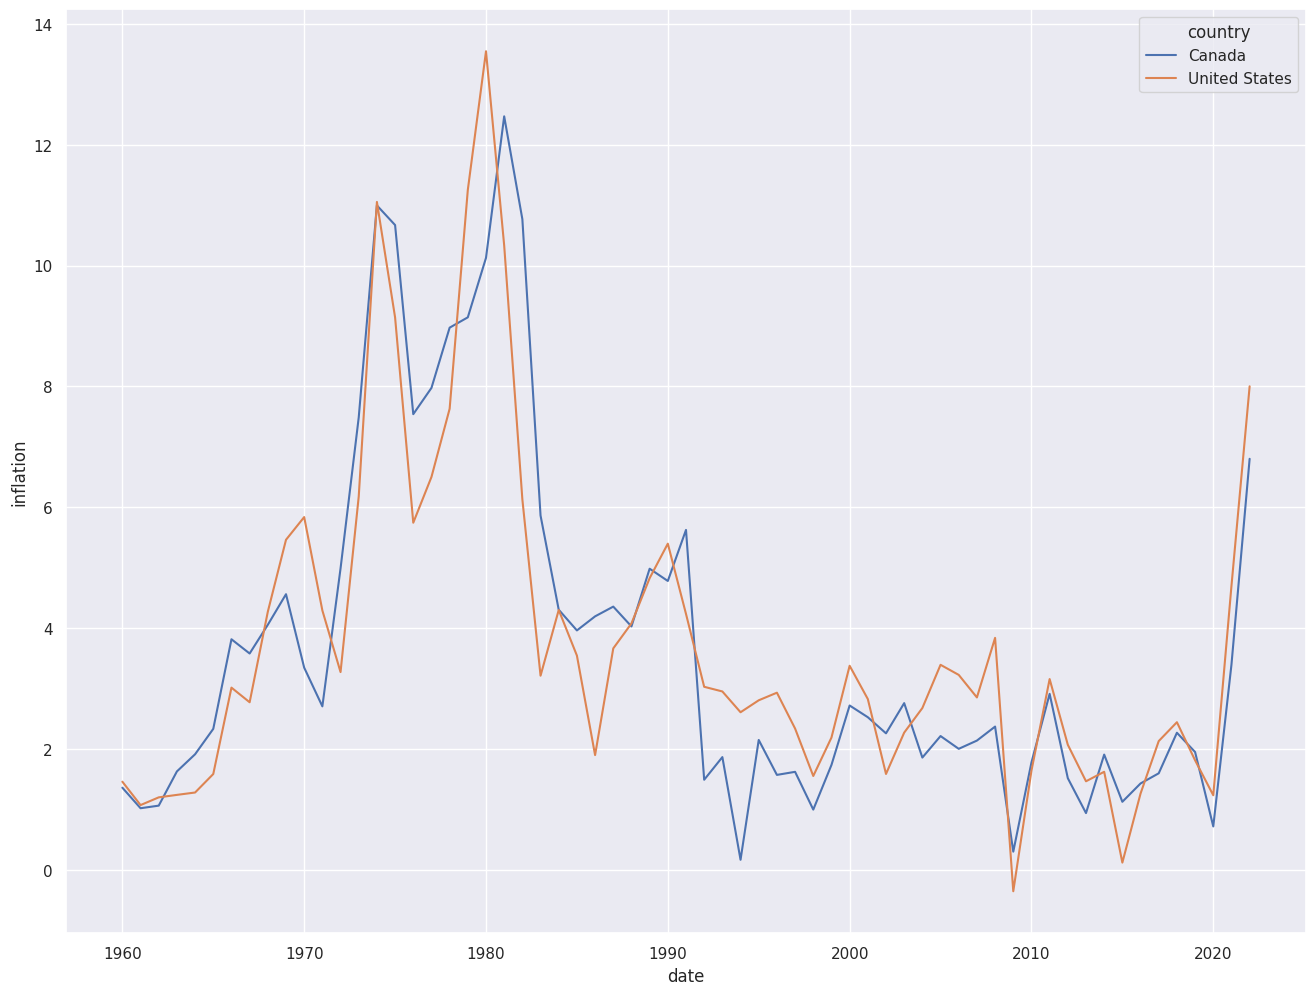

In [18]:
sns.lineplot(data=df, x="date", y="inflation", hue = "country")  #plot inflation in the two countries.

In [19]:
# ACTIVITY - Add your own code and call the world bank API to pull population or GDP stats from two countries of your choice and visualize.

### API Calls


Most services won't have their own bundled library to make API calls for you. Instead you will have the call the API yourself using a package like requests.


The City of LA makes a lot of data available in it's [LA Open data portal](https://data.lacity.org/). Let's call the API to download the data around 311 service request calls.





In [20]:
import requests
import json

In [21]:
target = "https://data.lacity.org/resource/4a4x-mna2.json"

data_311 = requests.get(target).json()

In [22]:
df_311 = pd.DataFrame.from_dict(data_311)

In [23]:
df_311.head(5)

,srnumber,createddate,updateddate,actiontaken,owner,requesttype,status,requestsource,createdbyuserorganization,mobileos,...,location,tbmpage,tbmcolumn,tbmrow,apc,cd,cdmember,nc,ncname,policeprecinct
0,1-3202602011,2023-01-01T00:00:46.000,2023-01-03T13:01:07.000,SR Created,LASAN,Bulky Items,Closed,Self Service,Self Service_SAN,,...,"{'type': 'Point', 'coordinates': [-118.3203053...",503,F,2,North Valley APC,7,Monica Rodriguez,10,Sunland-Tujunga,FOOTHILL
1,1-3202603151,2023-01-01T00:10:19.000,2023-01-06T20:43:59.000,SR Created,LASAN,Bulky Items,Closed,Self Service,Self Service,,...,"{'type': 'Point', 'coordinates': [-118.2981043...",633,J,1,Central APC,10,Heather Hutt,55,Wilshire Center-Koreatown,OLYMPIC
2,1-3202610701,2023-01-01T00:35:51.000,2023-01-04T13:45:56.000,SR Created,LASAN,Bulky Items,Closed,Self Service,Self Service_SAN,,...,"{'type': 'Point', 'coordinates': [-118.4071563...",532,F,6,South Valley APC,2,Paul Krekorian,21,Greater Valley Glen,NORTH HOLLYWOOD
3,1-3202605721,2023-01-01T00:36:43.000,2023-01-07T11:48:29.000,SR Created,LASAN,Metal/Household Appliances,Closed,Mobile App,Self Service,iOS,...,"{'type': 'Point', 'coordinates': [-118.3977044...",632,G,4,West Los Angeles APC,5,Katy Yaroslavsky,61,South Robertson,WEST LOS ANGELES
4,1-3202612411,2023-01-01T00:40:18.000,2023-04-06T12:50:30.000,SR Created,BSL,Single Streetlight Issue,Closed,Mobile App,Self Service,Android,...,"{'type': 'Point', 'coordinates': [-118.3755392...",632,J,6,South Los Angeles APC,10,Heather Hutt,73,Mid City,WILSHIRE


In [24]:
by_nc = df_311.groupby('ncname').count().reset_index()

<Axes: xlabel='createddate', ylabel='ncname'>

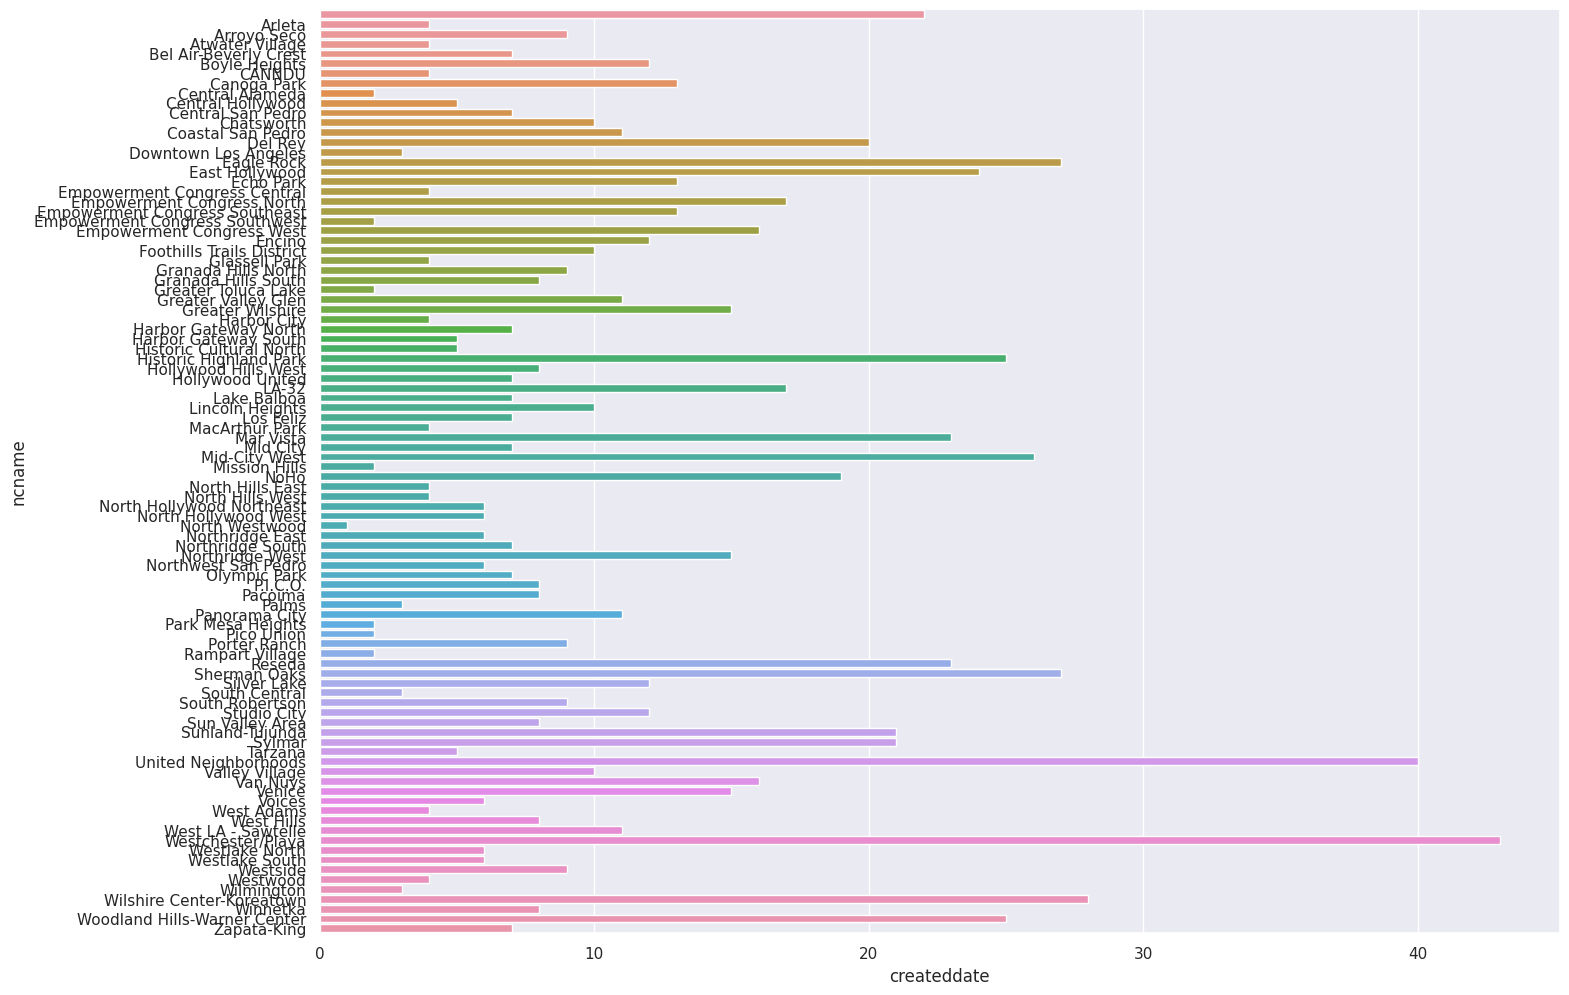

In [25]:
sns.barplot(data=by_nc, y="ncname", x="createddate")

In [26]:
#Some data sources will also directly expose CSV or Jsons to you which can be read via a URL

In [30]:
covid_data = pd.read_csv("https://storage.googleapis.com/covid19-open-data/v3/hospitalizations.csv")

In [32]:
covid_data.tail(5)

,date,location_key,new_hospitalized_patients,cumulative_hospitalized_patients,current_hospitalized_patients,new_intensive_care_patients,cumulative_intensive_care_patients,current_intensive_care_patients,new_ventilator_patients,cumulative_ventilator_patients,current_ventilator_patients
1768480,2022-09-11,US_WY,3.0,10754.0,13.0,NaN,NaN,3.0,NaN,NaN,NaN
1768481,2022-09-12,US_WY,4.0,10758.0,16.0,NaN,NaN,3.0,NaN,NaN,NaN
1768482,2022-09-13,US_WY,7.0,10765.0,16.0,NaN,NaN,2.0,NaN,NaN,NaN
1768483,2022-09-14,US_WY,7.0,10772.0,22.0,NaN,NaN,3.0,NaN,NaN,NaN
1768484,2022-09-15,US_WY,7.0,10779.0,22.0,NaN,NaN,3.0,NaN,NaN,NaN


In [ ]:
# ACTIVITY - Head to the LA open data site and download a dataset on city services, count the number of rows or produce some form of basic data product out of it.

### Github

Some organizations will host datasets on Github. You can either request of fork the dataset into your own repo or read the file directly from the raws. As an example here is polling data from [538](https://github.com/fivethirtyeight/data)


In [44]:
polling = pd.read_csv('https://projects.fivethirtyeight.com/polls-page/data/president_primary_polls.csv')

In [48]:
vivek= polling[polling['candidate_name'] == 'Vivek G. Ramaswamy']
vivek['dt'] = pd.to_datetime(vivek['start_date'])

<ipython-input-48-f16e90781bb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vivek['dt'] = pd.to_datetime(vivek['start_date'])


<Axes: xlabel='dt', ylabel='pct'>

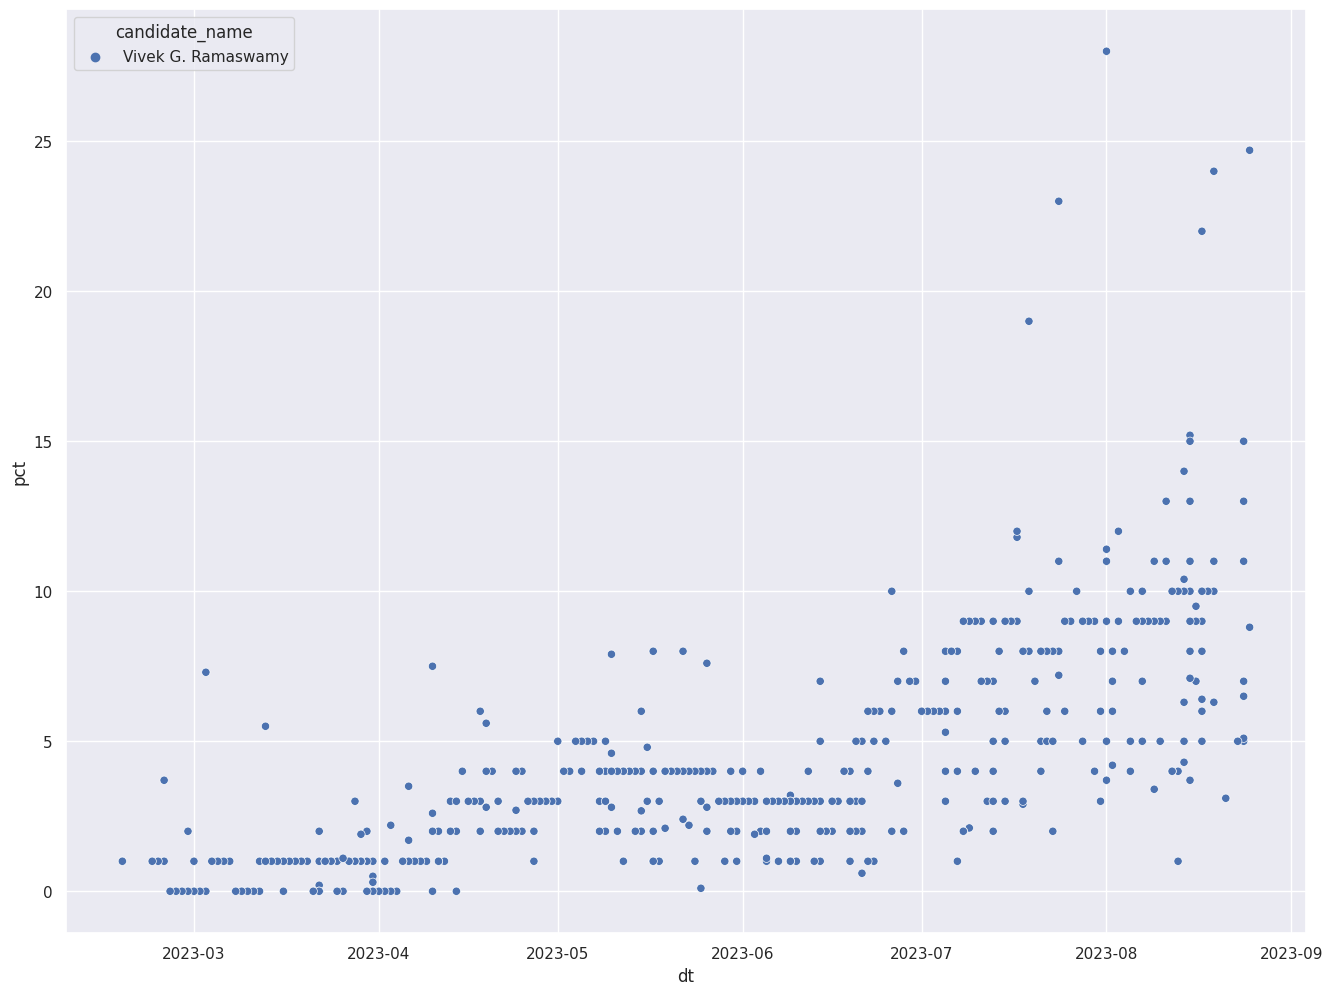

In [50]:
sns.scatterplot(vivek, x = 'dt', y  = 'pct', hue = 'candidate_name')

### Scraping

Sometimes a data source won't have an API or library for you to call. In this case we need to scrape the website. This is generally fair game if the data is not behind a login or paywall but be mindful of how much you scrape.

Structured data is easy to scrape just using pandas.

In [ ]:
top_charts = pd.read_html('https://en.wikipedia.org/wiki/List_of_Billboard_Hot_100_number-one_singles_of_the_2020s')

In [ ]:
top_by_time = top_charts[2]

In [ ]:
top_by_time.head(2)

,#,Reached number one,Artist(s),Single,Weeks at number one,References,Unnamed: 6_level_0
,2020,2020,2020,2020,2020,2020,2020
0,1096,"January 18, 2020",Roddy Ricch,"""The Box""",11,[5],NaN
1,1097,"April 4, 2020",The Weeknd,"""Blinding Lights"" ♪ [6]",4,[7],NaN


In [ ]:
top_by_time.columns = ['key', 'date', 'artist', 'song', 'weeks_at_1', 'refernce', 'trash']

In [ ]:
top_by_time.groupby('artist').count()['key']

artist
2021                                                                                                             1
2022                                                                                                             1
2023                                                                                                             1
24kGoldn featuring Iann Dior                                                                                     1
6ix9ine and Nicki Minaj                                                                                          1
Adele                                                                                                            1
Ariana Grande                                                                                                    1
Ariana Grande and Justin Bieber                                                                                  1
BTS                                                                      

In [ ]:
from bs4 import BeautifulSoup

Unstructured data needs to be selected using CSS style markers. The easiest way to do this is by using the [Selector Gadget](https://chrome.google.com/webstore/detail/selectorgadget/mhjhnkcfbdhnjickkkdbjoemdmbfginb) extension. This will highlight the CSS flags that identify a piece of content. This can be fed into a scraper to return the data.

In [ ]:
url = "https://www.boxofficemojo.com/year/?area=XWW"
response = requests.get(url)
parser = BeautifulSoup(response.text)

In [ ]:
titles = parser.select(".mojo-cell-wide")
top_movie_titles = [str(x.string) for x in titles]

In [ ]:
revenue = parser.select(".mojo-sort-column+ .mojo-field-type-money")
top_movie_revenue = [str(x.string) for x in revenue]

In [ ]:
year = parser.select(".mojo-sort-column")
movie_year = [str(x.string) for x in year]

In [ ]:
revenue_data = pd.DataFrame({'year' : movie_year, 'title' : top_movie_titles, 'revenue' : top_movie_revenue})
clean_rev = revenue_data.loc[revenue_data['revenue'] != 'None'].copy()
clean_rev['revenue'] = clean_rev['revenue'].replace("[$,]", "", regex=True).map(int)
clean_rev['year'] = clean_rev['year'].map(int)

<Axes: xlabel='year', ylabel='revenue'>

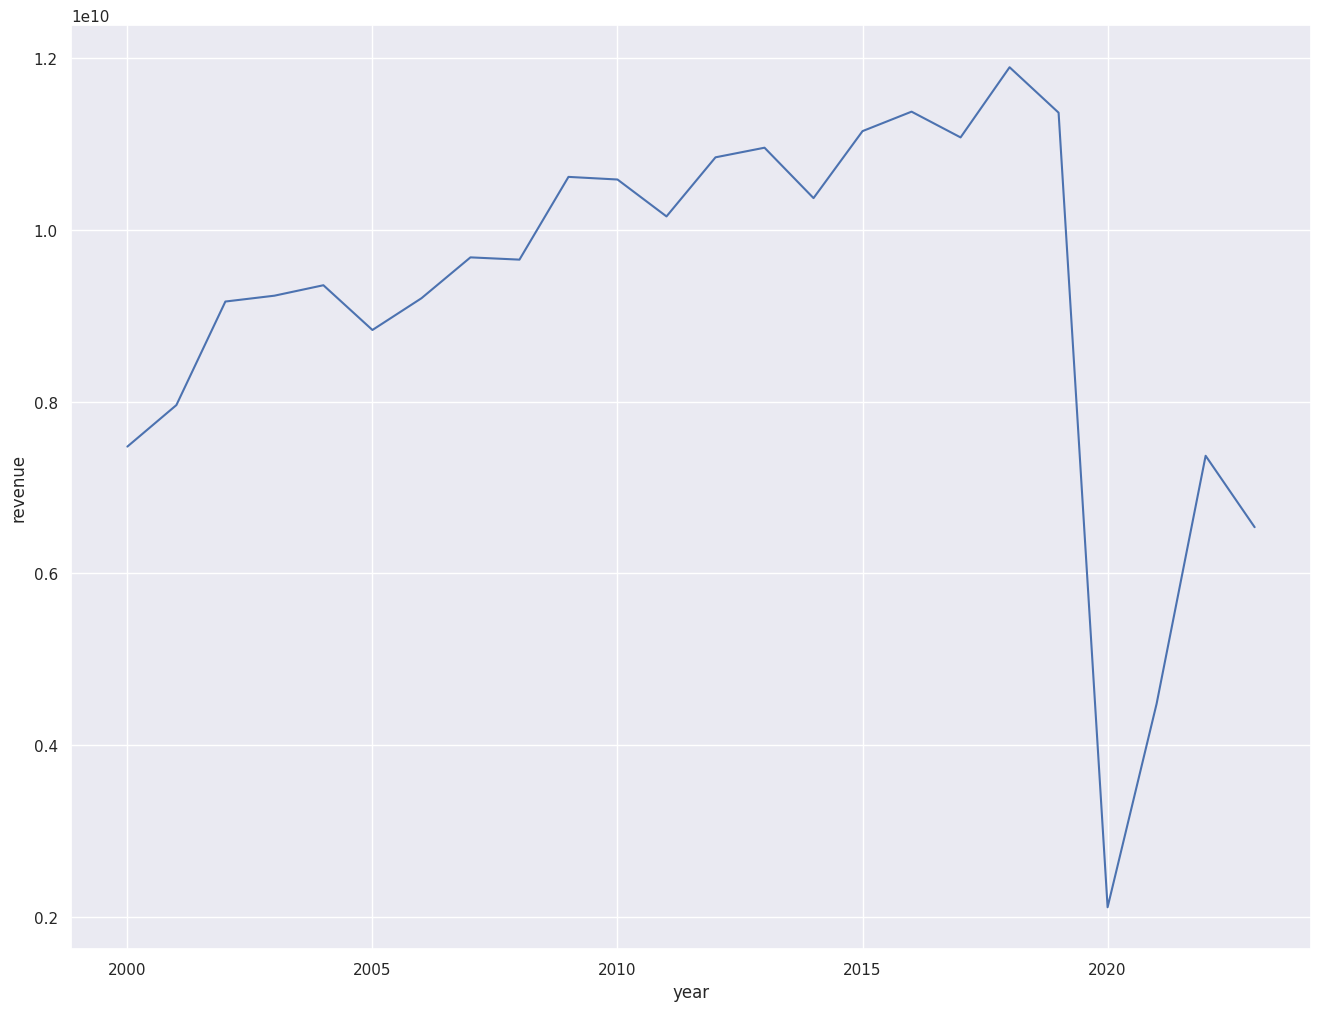

In [ ]:
sns.lineplot(clean_rev, x = 'year', y = 'revenue')

Scraping is a gigantic pain in the butt compared to other methods. Suggest using alternatives when possible

In [ ]:
#Activity - Work with the rest of the class to build a compilation of known data sources and how to access them